# Linear Regression

In [1]:
%matplotlib inline

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D


## Regression with 2 variables

### 1. Import and visualize data

In [3]:
df = pd.read_csv('datasets/linreg.txt', names=['X','Y'])

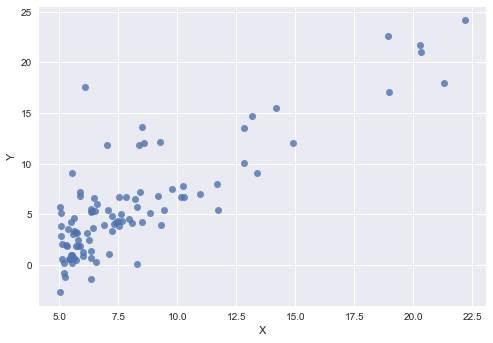

In [4]:
sns.regplot(x='X', y='Y', data=df, fit_reg=False)
plt.show()

### 2. Regression

In [32]:
X_train, X_test, y_train, y_test = np.asarray(train_test_split(df['X'], df['Y'], test_size=0.1))

In [33]:
reg = LinearRegression()

In [34]:
X_train.values

array([  9.3102,   7.6366,   6.3534,   5.3054,   5.7107,   5.5204,
         7.2259,  13.394 ,   9.4536,   5.4369,   5.6397,   5.7737,
         6.3557,  10.136 ,   9.7687,   6.5894,  11.708 ,  20.27  ,
         9.2482,  18.959 ,   5.0594,   8.0959,   6.5159,   5.7292,
         5.6407,   5.0546,  14.908 ,   5.8014,   7.6031,   6.3328,
        13.176 ,   8.5172,   7.8247,   6.3589,   5.3794,   6.4296,
         5.8598,   7.4239,   6.4862,  10.236 ,   5.5277,   7.2182,
         6.0062,   5.8918,  12.828 ,   7.3345,   6.1101,   5.7077,
         7.5402,  14.164 ,   6.002 ,   9.1802,   5.4901,   7.0931,
         5.1301,  18.945 ,   8.5781,   5.1884,  11.7   ,   7.5386,
         8.5186,   5.5649,  20.341 ,   5.8707,  10.957 ,   6.3261,
         7.0032,   7.9334,   8.2951,   8.4084,   6.5479,   5.6063,
         5.3077,   5.4994,   8.3829,  21.279 ,   5.2524,   5.1793,
        12.836 ,   6.2742,   7.4764,   5.734 ,   6.3654,   5.1077,
         8.8254,   5.0269,   6.1891])

In [35]:
y_test.values

array([  5.1337 ,   5.3893 ,   3.9115 ,   0.55657,   0.14454,   1.0179 ,
        24.147  ,   6.5426 ,   6.7526 ,   5.7014 ])

In [36]:
reg.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
# The coefficient R^2 is defined as (1 - u/v),
#   where u is the residual sum of squares ((y_true - y_pred) ** 2).sum()
#   and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().
# The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

print('Score: ', reg.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1)))

Score:  0.836537767384


### 3. Plot regression and visualize results

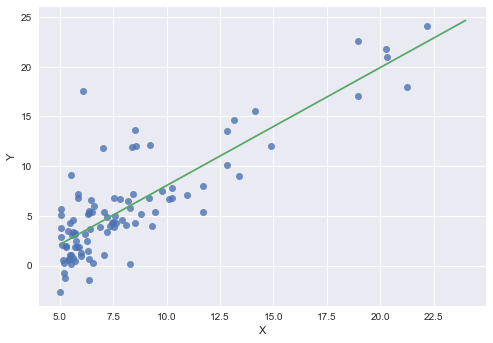

In [41]:
x_line = np.arange(5,25).reshape(-1,1)
sns.regplot(x=df['X'], y=df['Y'], data=df, fit_reg=False)

plt.plot(x_line, reg.predict(x_line))
plt.show()

## Regression with 3 variables

### 1. Data preprocessing

In [55]:
# Import data
co2_df = pd.read_csv('datasets/global_co2.csv')
co2_df.head()

,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN


In [56]:
temp_df = pd.read_csv('datasets/annual_temp.csv')
temp_df.head()

,Source,Year,Mean
0,GCAG,2015,0.8990
1,GISTEMP,2015,0.8700
2,GCAG,2014,0.7402
3,GISTEMP,2014,0.7500
4,GCAG,2013,0.6687


In [57]:
# Clean data
co2_df = co2_df.ix[:,:2]                     # Keep only total CO2
co2_df = co2_df.ix[co2_df['Year'] >= 1960]   # Keep only 1960 - 2010
co2_df.columns=['Year','CO2']                # Rename columns
co2_df = co2_df.reset_index(drop=True)       # Reset index
co2_df.head()

,Year,CO2
0,1960,2569
1,1961,2580
2,1962,2686
3,1963,2833
4,1964,2995


In [58]:
# Clean data
temp_df = temp_df[temp_df.Source != 'GISTEMP']                              # Keep only one source
temp_df.drop('Source', inplace=True, axis=1)                                # Drop name of source
temp_df = temp_df.reindex(index=temp_df.index[::-1])                        # Reset index
temp_df = temp_df.ix[temp_df['Year'] >= 1960].ix[temp_df['Year'] <= 2010]   # Keep only 1960 - 2010
temp_df.columns=['Year','Temperature']                                      # Rename columns
temp_df = temp_df.reset_index(drop=True)                                    # Reset index
temp_df.head()

,Year,Temperature
0,1960,0.0252
1,1961,0.0818
2,1962,0.0924
3,1963,0.1100
4,1964,-0.1461


In [59]:
# Concatenate
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis=1)

climate_change_df.head()

,Year,CO2,Temperature
0,1960,2569,0.0252
1,1961,2580,0.0818
2,1962,2686,0.0924
3,1963,2833,0.1100
4,1964,2995,-0.1461


### 2. Vizualize initial data

#### 3D Plot

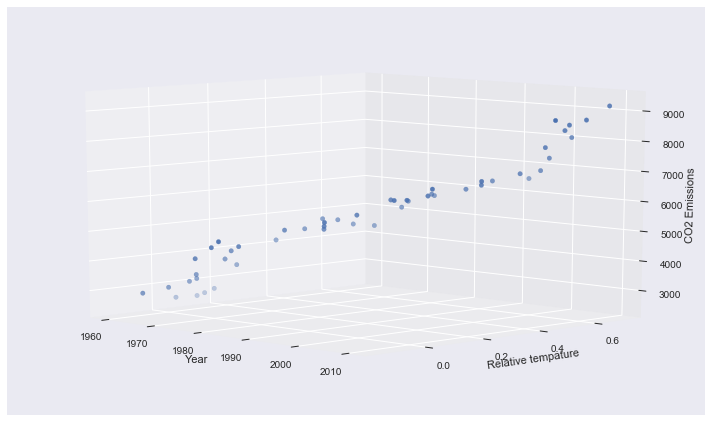

In [60]:
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

#### Projected 2D plots

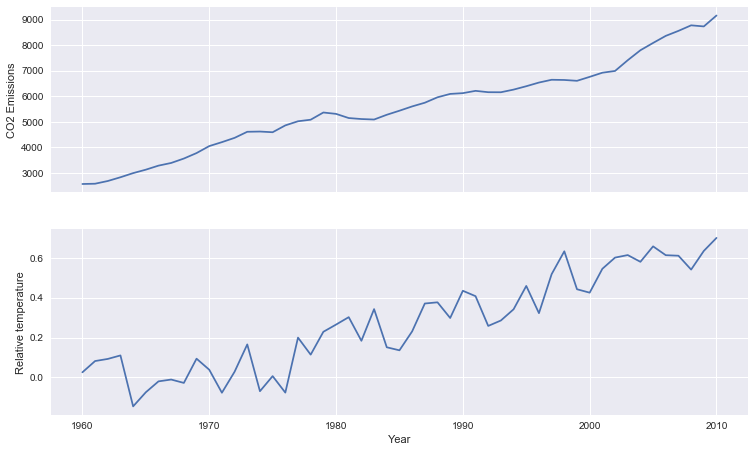

In [61]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')

### 3. Linear Regression

In [63]:
X = climate_change_df.as_matrix(['Year'])
Y = climate_change_df.as_matrix(['CO2', 'Temperature']).astype('float32')

In [ ]:
#S

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
print('Score: ', reg.score(X_test.reshape(-1, 1), y_test))

### 4. Plot regression and visualize results

In [ ]:
x_line = np.arange(1960,2011).reshape(-1,1)
p = reg.predict(x_line).T

#### 3D Plot

In [ ]:
fig2 = plt.figure()
fig2.set_size_inches(12.5, 7.5)
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs=climate_change_df['Year'], ys=climate_change_df['Temperature'], zs=climate_change_df['CO2'])
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.plot(xs=x_line, ys=p[1], zs=p[0], color='green')
ax.view_init(10, -45)

#### Projected 2D plots

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_change_df['Year'], climate_change_df['CO2'])
axarr[0].plot(x_line, p[0])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_change_df['Year'], climate_change_df['Temperature'])
axarr[1].plot(x_line, p[1])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')